1. SMS Spam Collection dataset http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

In [1]:
from IPython.display import clear_output

In [2]:
!unzip smsspamcollection.zip
clear_output()

In [3]:
import pandas as pd

dataset = pd.read_csv("SMSSpamCollection.txt", sep='\t', names=['label', 'data'])

In [4]:
dataset['label'] = dataset['label'].apply(lambda x: 1 if x == 'spam' else 0)

2. Splitting to train and test set.

In [5]:
from sklearn.model_selection import train_test_split

y_train, y_test, x_train, x_test = train_test_split(dataset['label'], dataset['data'], test_size=0.1)

3. Vector representation of data.

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True)
features_train = vectorizer.fit_transform(x_train).todense()
features_test = vectorizer.transform(x_test).todense()

4. Classifiers.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB

classifier1 = GaussianNB()
classifier2 = MultinomialNB()
classifier3 = ComplementNB()
classifier4 = BernoulliNB()

classifiers = [classifier1, classifier2, classifier3, classifier4]
names = ["Gaussian", "Multinomial", "Complement", "Bernoulli"]
accuracies = []

In [8]:
for classifier, name in zip(classifiers, names):
  classifier.fit(features_train, y_train)
  accuracy_score = classifier.score(features_test, y_test) * 100
  print("{} classifier gives {:.2f} accuracy".format(name, accuracy_score))

Gaussian classifier gives 89.78 accuracy
Multinomial classifier gives 95.88 accuracy
Complement classifier gives 97.85 accuracy
Bernoulli classifier gives 97.49 accuracy


Preprocessing data. Normalizing to range `0 to 1`.

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_train_scaled = scaler.fit_transform(features_train)

5. Visualization of decision boundaries.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


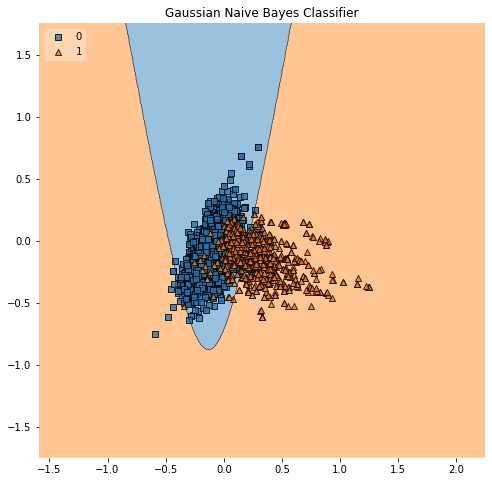

In [10]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

fig = plt.figure(figsize=(8,8))

classifier = GaussianNB()
pca = PCA(n_components = 2)

features_train_scaled_reduced = pca.fit_transform(features_train_scaled)
classifier.fit(features_train_scaled_reduced, y_train)

fig = plot_decision_regions(X=features_train_scaled_reduced, y=np.array(y_train), clf=classifier, legend=2)

plt.title("Gaussian Naive Bayes Classifier")
plt.show()

Reference: https://towardsdatascience.com/how-to-build-your-first-spam-classifier-in-10-steps-fdbf5b1b3870